In [1]:
%matplotlib inline  
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import tensorflow as tf                                                                              


x_data= np.random.rand(50,2).astype(float)
y_data = np.expand_dims(((x_data[:,1] > 0.5)*( x_data[:,0] > 0.5)).astype(int),axis=1)



In [2]:
def plot_data(X1,X2,Y):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.scatter(X1[Y>0], X2[Y>0], np.ones(X1[Y>0].shape) ,c='b',marker='o')
    surf = ax.scatter(X1[Y<=0], X2[Y<=0], np.zeros(X1[Y<=0].shape) ,c='r',marker='^')
    plt.show()

/Users/markchang/.pyenv/versions/anaconda-2.3.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


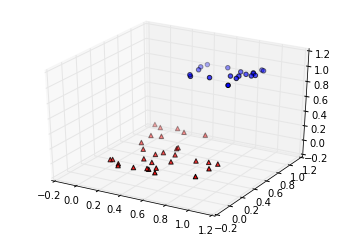

In [3]:
plot_data(x_data[:,0], x_data[:,1], y_data.T[0,:])


In [4]:
def plot_logistic(b,w0,w1,mx1,mx2,my):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X1, X2 = np.mgrid[-0.2:1.2:0.1, -0.2:1.2:0.1]
    X0 = np.ones(X1.shape)
    Z=np.divide(1,1+np.exp(-1*(np.multiply(b,X0)+np.multiply(w0,X1)+np.multiply(w1,X2)) ))
    surf = ax.plot_wireframe(X1, X2, Z, cstride=1, rstride=1)
    ax.set_title(("b=%s, w0=%s, w1=%s")%(b,w0,w1))
    surf = ax.scatter(mx1[my>0], mx2[my>0], np.ones(mx1[my>0].shape) ,c='b',marker='o')
    surf = ax.scatter(mx1[my<=0], mx2[my<=0], np.zeros(mx1[my<=0].shape) ,c='r',marker='^')
    plt.show()

step:0,
w:[[ 0.16321993]
 [ 0.03734335]],
b:[[-0.3028709]],
error:32.8326


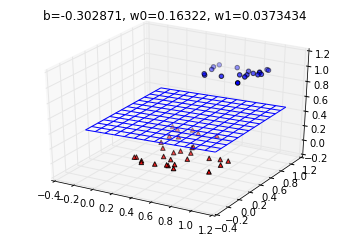

step:50,
w:[[ 4.9541235]
 [ 4.3938117]],
b:[[-5.96000767]],
error:13.1564


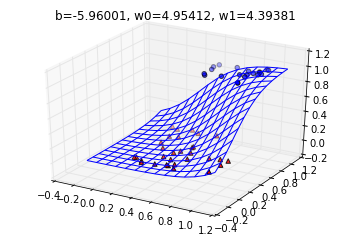

step:100,
w:[[ 6.33196831]
 [ 5.82779264]],
b:[[-7.73178434]],
error:11.6999


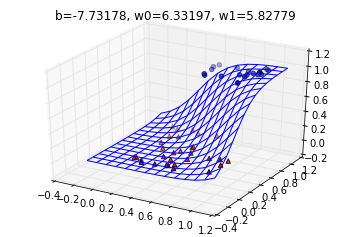

step:150,
w:[[ 7.14226437]
 [ 6.71268606]],
b:[[-8.80018806]],
error:11.1788


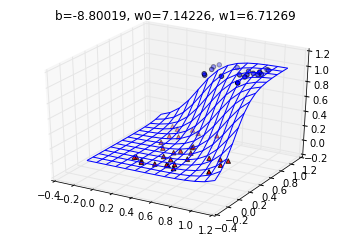

step:200,
w:[[ 7.71019411]
 [ 7.33558655]],
b:[[-9.55014038]],
error:10.923


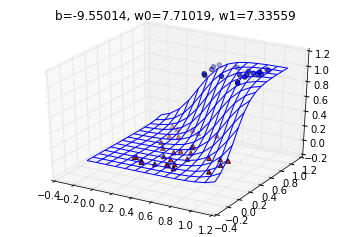

step:250,
w:[[ 8.13935852]
 [ 7.80451488]],
b:[[-10.11531639]],
error:10.7778


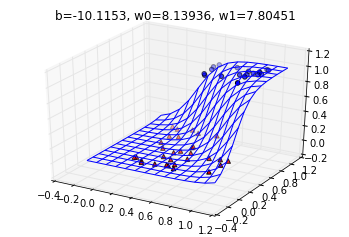

step:300,
w:[[ 8.47748566]
 [ 8.1722374 ]],
b:[[-10.55924702]],
error:10.6883


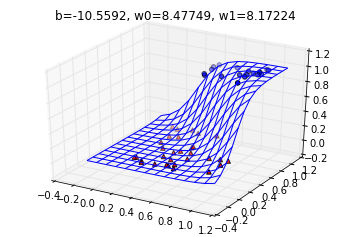

step:350,
w:[[ 8.751091  ]
 [ 8.46853542]],
b:[[-10.91750908]],
error:10.6301


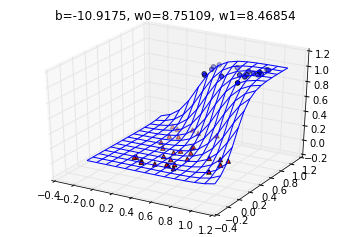

step:400,
w:[[ 8.97663212]
 [ 8.71191692]],
b:[[-11.212183]],
error:10.5906


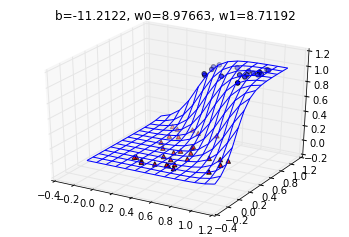

step:450,
w:[[ 9.16510201]
 [ 8.91469669]],
b:[[-11.45797634]],
error:10.5632


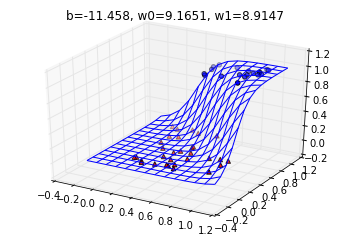

In [5]:

x_ = tf.placeholder(tf.float32,[None,2], name="x_")
y_ = tf.placeholder(tf.float32,[None,1], name="y_")
w = tf.Variable(tf.random_uniform([2,1], -1.0, 1.0), name="w")
b = tf.Variable(tf.zeros([1,1]), name="b")
y = tf.nn.sigmoid(tf.matmul(x_,w)+b)

cross_entropy = -tf.reduce_sum(y_*tf.log(y) + (1-y_) * tf.log(1-y))

optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(cross_entropy)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)
for step in xrange(500):
    sess.run(train,feed_dict={x_:x_data,y_:y_data})
    if step % 50 == 0:
        wi = sess.run(w)
        bi = sess.run(b)
        ce = sess.run(cross_entropy,feed_dict={x_:x_data,y_:y_data})
        print "step:%s,\nw:%s,\nb:%s,\nerror:%s" %(step,wi, bi, ce)
        plot_logistic(bi[0,0],wi[0,0],wi[1,0],x_data[:,0], x_data[:,1], y_data.T[0,:])